In [171]:
from SL_C0de.grid import LOAD_TIME_GRID

Sediment_load=LOAD_TIME_GRID(from_file=(True,'F:/SL_C0de/AYEYARWADY/26kyr_AYS1/VM5a.l32.um20.25.lm22.699/LOAD/OCEANIC_SEDIMENT_LOAD_122_512'))

In [172]:
# from SL_C0de.love import LOVE
# import numpy as np
# import sys
# np.set_printoptions(threshold=sys.maxsize)
# maxdeg=512
# stop=26 # define the number of time steps
# step=0.5
# time_step=np.arange(start=stop,stop=-step,step=-step)
# love_number=LOVE(maxdeg,'C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/variable_um_32/VM5a.l32.um21.lm22.699',time_step,6371000,5.9742e24)

In [173]:
# import matplotlib.pyplot as plt
# import math
# plt.plot(love_number.beta_R_l[-1,:,:128].T)

In [174]:
Sediment_load.height_time_coeff=Sediment_load.viscuous_deformation+Sediment_load.elastic_deformation

In [175]:


Transect=Sediment_load.along_transect(coord=(90+20,180+96,90+13,180+96),point_density=100,backend=True)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


C:\Users\ahenry01\AppData\Local\Temp\ipykernel_21276\4206121710.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=pl.cm.jet_r))


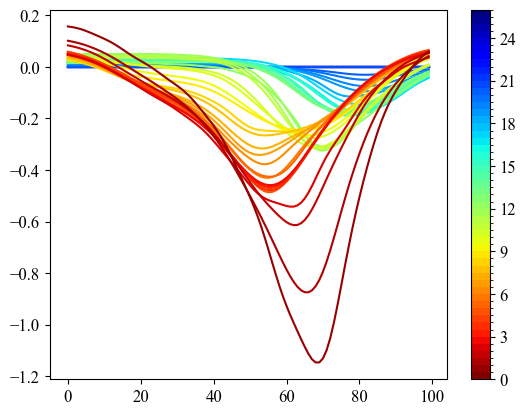

In [176]:
import matplotlib.pyplot as plt
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
import math
import numpy as np
colors=pl.cm.jet(np.linspace(0,1,Transect.shape[1]))
for i in range(Transect.shape[1]-1):
    plt.plot((np.diff(Transect*math.pi*4,axis=1)[:,i])*2,color=colors[i])
norm = mpl.colors.BoundaryNorm(Sediment_load.time_step[::-1], pl.cm.jet.N)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=pl.cm.jet_r))
plt.show()


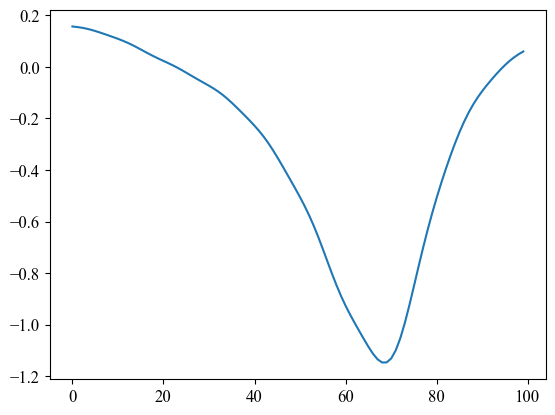

In [177]:
plt.plot((np.diff(Transect*math.pi*4,axis=1)[:,-1])*2)

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_21276\4142627610.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=pl.cm.jet_r))


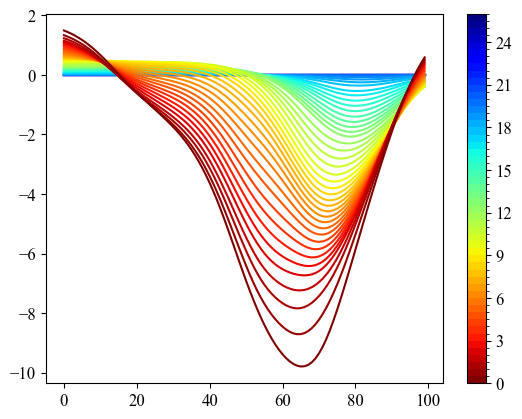

In [178]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
import math
import numpy as np
colors=pl.cm.jet(np.linspace(0,1,Transect.shape[1]))
for i in range(Transect.shape[1]):
    plt.plot((Transect[:,i])*4*math.pi*2,color=colors[i])
norm = mpl.colors.BoundaryNorm(Sediment_load.time_step[::-1], pl.cm.jet.N)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=pl.cm.jet_r))
plt.show()

In [179]:
#Sediment_load.height_time_coeff=Sediment_load.load

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_21276\2189319424.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 100)


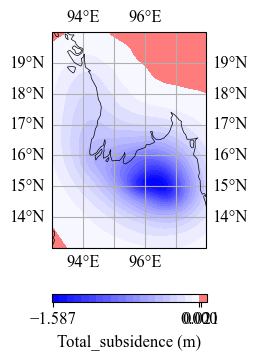

In [180]:
import cartopy
import cartopy.crs as ccrs
import matplotlib
from matplotlib import cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

t_it=np.where(Sediment_load.time_step==0)[0][0]
#ocean_time_grid.coeff=ocean_time_grid.height_time_coeff[:t_it,:].sum(0)-ocean_time_grid.height_time_coeff.sum(0)
Sediment_load.coeff_from_step(t_it-2)
Sediment_load.coeff=(Sediment_load.coeff_from_step(t_it-2).coeff-Sediment_load.coeff_from_step(t_it-3).coeff)*2
grid,lon_hd,lat_hd=Sediment_load.coefftogrdhd(1024)
cmap=cm.get_cmap('bwr', 100)
alpha_ocean=0
coast_line_width=0.5

fig = plt.figure(figsize=(4,4), facecolor="none")
area=(93,98,13,20)

#lat_hd=lat_hd[::-1]
#find the closest position :
lon_lim_min=np.abs(lon_hd-area[0]).argmin()
lon_lim_max=np.abs(lon_hd-area[1]).argmin()
lat_lim_min=np.abs(lat_hd-area[2]).argmin()
lat_lim_max=np.abs(lat_hd-area[3]).argmin()
lon=lon_hd[lon_lim_min:lon_lim_max+1]
lat=lat_hd[lat_lim_min:lat_lim_max+1]
grid=grid[lat_lim_min:lat_lim_max+1,lon_lim_min:lon_lim_max+1]

norm = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)
#norm = colors.TwoSlopeNorm(vmin=ocean_time_grid.height_time_grid[t_it,:,:].min(),vmax=ocean_time_grid.height_time_grid[t_it,:,:].max(),vcenter=0)
ax1  = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.set_extent(area)
m2 = ax1.contourf(lon,lat,grid,20,origin='lower', transform=ccrs.PlateCarree(),extent=area, zorder=0, cmap=cmap, interpolation="gaussian",norm=norm)
cbar2=plt.colorbar(mappable=m2, orientation="horizontal", shrink=0.5)
cbar2.set_label('Total_subsidence (m)')
cbar2.set_ticks([grid.min(), 0, grid.max()])
cartopy.mpl.geoaxes.GeoAxes.gridlines(ax1,crs=ccrs.PlateCarree(),draw_labels=True)
ax1.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax1.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

In [97]:
from SL_C0de.grid import OCEAN_TIME_GRID
sediment=OCEAN_TIME_GRID(from_file=(True,'F:/SL_C0de/AYEYARWADY/Test/VM5a.l32.um21.lm22.699/OCEAN_AYS2_26_512'))

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_21276\1044945383.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


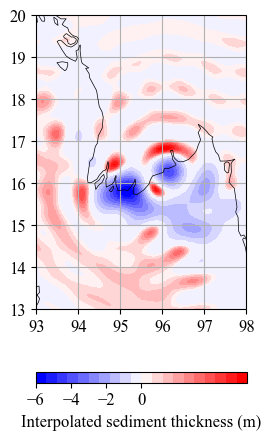

In [98]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

selected_time=0


t_it=np.where(sediment.time_step==0)[0][0]
sediment.coeff_from_step(t_it-2)
grid,lon_hd,lat_hd=sediment.coefftogrdhd(4000)

area=(93,98,13,20)

cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm1 = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(222, projection=ccrs.PlateCarree())
ax.set_extent(area)
colormap = cmap
m = ax.imshow(grid, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm1)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Interpolated sediment thickness (m)')
#cbar.set_ticks([sed_time_grid.height_time_grid[our_ind,:,:].min(), 0, sed_time_grid.height_time_grid[ind,:,:].max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)
ax.gridlines()
ax.set_xticks(np.arange(area[0],area[1]+1,1))
ax.set_yticks(np.arange(area[2],area[3]+1,1))

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_21276\1217851584.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 100)


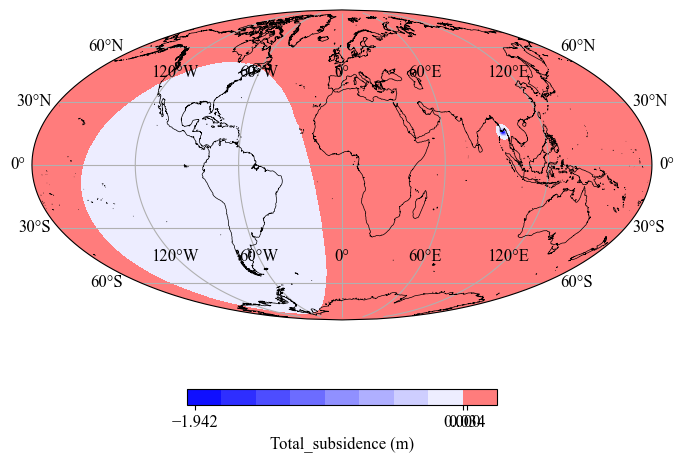

In [144]:
#world 
import cartopy
import cartopy.crs as ccrs
import matplotlib
from matplotlib import cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

t_it=np.where(Sediment_load.time_step==0)[0][0]
#ocean_time_grid.coeff=ocean_time_grid.height_time_coeff[:t_it,:].sum(0)-ocean_time_grid.height_time_coeff.sum(0)
Sediment_load.coeff_from_step(t_it-2)
grid,lon_hd,lat_hd=Sediment_load.coefftogrdhd(1024)
cmap=cm.get_cmap('bwr', 100)
alpha_ocean=0
coast_line_width=0.5

fig = plt.figure(figsize=(8,6), facecolor="none")

#lat_hd=lat_hd[::-1]
#find the closest position :

norm = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)
#norm = colors.TwoSlopeNorm(vmin=ocean_time_grid.height_time_grid[t_it,:,:].min(),vmax=ocean_time_grid.height_time_grid[t_it,:,:].max(),vcenter=0)
ax1  = plt.subplot(111, projection=ccrs.Mollweide())
ax1.set_global()
m2 = ax1.contourf(lon_hd,lat_hd,grid, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360,-89,89], zorder=0, cmap=cmap, interpolation="gaussian",norm=norm)
cbar2=plt.colorbar(mappable=m2, orientation="horizontal", shrink=0.5)
cbar2.set_label('Total_subsidence (m)')
cbar2.set_ticks([grid.min(), 0, grid.max()])
cartopy.mpl.geoaxes.GeoAxes.gridlines(ax1,crs=ccrs.PlateCarree(),draw_labels=True)
ax1.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax1.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)